In [1]:
import numpy.testing as nt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.io import loadmat
output = loadmat('output.mat')

97.552967789


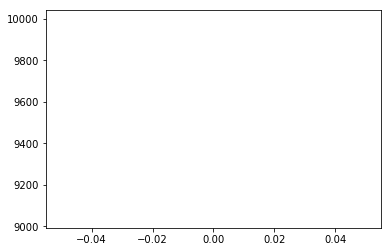

In [4]:
# testing no sparsity, no smoothnes, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

print(LA.norm(output['V'] - (model.W@model.H)))

plt.plot(model.cost)

In [5]:
# testing the initial distance
nt.assert_almost_equal(LA.norm(output['V'] - (output['init_W']@output['init_H'])),213.432630275)

In [6]:
# compare cost after 1 iteration
nt.assert_almost_equal(model.cost, 9516.581524438)

In [7]:
# testing no sparsity, no smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],3636.162716116)

In [8]:
# testing sparsity, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=0, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],4750.738752595)

In [9]:
# testing smoothness, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=0, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

import numpy.linalg as LA
print(LA.norm(model.W))
print(LA.norm(model.H))

nt.assert_almost_equal(LA.norm(model.W),4.7809,decimal=4)
nt.assert_almost_equal(LA.norm(model.H),39.6015,decimal=4)
nt.assert_almost_equal(model.cost[-1],6667.921143908)

4.78094441581
39.6015552377


In [10]:
# testing sparsity and smoothness, 1 iteration
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],6715.167611171)


In [11]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3909.6946, decimal=4)

In [12]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.1, betaH=0.1)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3893.69665, decimal=4)

**Testing on the sonar dataset.**

In [34]:
from scipy.io import loadmat
output = loadmat('sonar_output.mat')

In [35]:
init_W = output['params_all']['init_W'][0,0]
init_H = output['params_all']['init_H'][0,0]
max_iter = output['params_all']['max_iter'][0,0]

2516.92281757
CPU times: user 3min 2s, sys: 36.7 s, total: 3min 39s
Wall time: 2min 52s


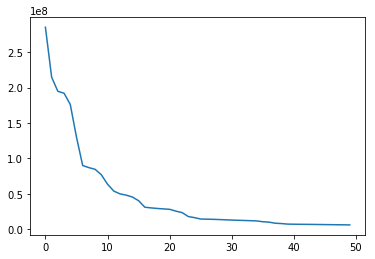

In [37]:
%%time
# testing no sparsity, no smoothnes, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=3, max_iter=50, betaW=0, betaH=0)
model.fit(output['LL'], W=init_W, H=init_H)

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

In [38]:
model.W.shape

(15984, 3)

In [39]:
W_reshaped = model.W.reshape(3, 144, 37, 3)

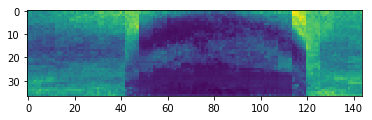

In [40]:
plt.imshow(W_reshaped[0,:,:,2].T)

In [41]:
# seems rank is 3 instead of 5 ???

In [42]:
output['params_all'][0]

array([ (array([[3]], dtype=uint8), array([[50]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[ 0.01]]), array([[ 0.81472369,  0.89638499,  0.9765793 ],
       [ 0.90579194,  0.82233698,  0.64965081],
       [ 0.12698682,  0.88278375,  0.94581752],
       ..., 
       [ 0.74448884,  0.53463759,  0.12153136],
       [ 0.21285622,  0.70127087,  0.9951019 ],
       [ 0.10012246,  0.33829382,  0.32230971]]), array([[ 0.61255865,  0.52494092,  0.85378614,  0.57182458,  0.52551211,
         0.90362677,  0.14140459,  0.23764004,  0.33325914,  0.07234922,
         0.18453061,  0.88927026,  0.89008589,  0.77351042,  0.28932945,
         0.2436337 ,  0.81959437,  0.35335566,  0.65919615,  0.87309013,
         0.69143526,  0.27778146,  0.50337604,  0.13789708,  0.72801385,
         0.32615465,  0.20726351,  0.46598106,  0.33208926,  0.20162799,
         0.72066244,  0.06452473,  0.52438631,  0.49361092,  0.43295562,
         0.66192381,  0.46155452,  0.99513164,  0.

In [43]:
print(LA.norm(output['W'] - model.W))
print(LA.norm(output['H'] - model.H))

4.24134994883e-11
1.41771074495e-12


In [44]:
# output['params_all']['max_iter'][0,0]

In [45]:
# display projection on first component

In [ ]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations
betaW = 1.001
betaH = 1.001
model = smoothNMF(r=3, max_iter=50, betaW=1.001, betaH=1.001)
model.fit(output['LL'], W=init_W, H=init_H)

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)